In [11]:

## Select Jupyter Server --> Existing --> http://192.168.8.10:8888/
## Password int2


# Example Material Source: https://www.tensorflow.org/tutorials/images/cnn
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, Sequential, regularizers,optimizers,callbacks
from keras.utils import np_utils
import matplotlib.pyplot as plt
import math
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [13]:
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3)
test_images = test_images.reshape(test_images.shape[0], 32, 32, 3)


##one hot encoding
train_labels = np_utils.to_categorical(train_labels,10)
test_labels = np_utils.to_categorical(test_labels,10)
print(train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [14]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
##train_images, test_images = preProcess(train_images), preProcess(test_images)
##train_images, test_images = contrastCurve(train_images), contrastCurve(test_images)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [15]:
## Transforming images to get a larger test set

data_augmentation = Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
    input_shape=(64,64,3)),
    layers.experimental.preprocessing.RandomRotation(0.15),
    layers.experimental.preprocessing.RandomZoom(0.05),
    ##layers.experimental.preprocessing.RandomContrast(0.075),
  ]
)

In [16]:
##tf.keras.layers.Conv2D(
##    filters, kernel_size, strides=(1, 1), padding='valid',
##    data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
##    use_bias=True, kernel_initializer='glorot_uniform',
##    bias_initializer='zeros', kernel_regularizer=None,
##    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
##    bias_constraint=None, **kwargs
##)

##--------------  VGG Based + Dynamic Learning Rates --------------

def learing_rate_callback(epoch_number,lr):
    if(epoch_number < 50):
        return 0.005
    elif(epoch_number >50 and epoch_number <100):
        return 0.0005

    return lr*0.995
    

model = models.Sequential()
## Up sampling to try and get more feature points and allow for more layers
model.add(layers.UpSampling2D(size=(2,2),interpolation="bilinear",input_shape=(32, 32, 3)))
model.add(data_augmentation)

weight_decay = 0.00011181
weight_decay = 8.950000000000001e-05
dropout_rate = 0.3

model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3),kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())


model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(dropout_rate*0.75))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(dropout_rate*0.90))

model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Dropout(dropout_rate))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(dropout_rate*0.90))

model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Activation('elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (1, 1), activation='relu', kernel_initializer='he_uniform', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))


model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Dropout(dropout_rate))
##model.add(layers.Dense(512, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=regularizers.l2(weight_decay)))
##model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(10, activation='softmax'))
# compile model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_1 (UpSampling2 (None, 64, 64, 3)         0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_10 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 64, 64, 32)       

In [18]:
##model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history = model.fit(train_images, train_labels,batch_size=500,  epochs=300, validation_data=(test_images, test_labels),use_multiprocessing=True,callbacks=[callbacks.LearningRateScheduler(learing_rate_callback, verbose=0)])

al_accuracy: 0.8988
Epoch 166/300
100/100 [==============================] - 46s 465ms/step - loss: 0.3486 - accuracy: 0.9279 - val_loss: 0.4416 - val_accuracy: 0.8986
Epoch 167/300
100/100 [==============================] - 46s 465ms/step - loss: 0.3489 - accuracy: 0.9259 - val_loss: 0.4166 - val_accuracy: 0.9056
Epoch 168/300
100/100 [==============================] - 46s 461ms/step - loss: 0.3450 - accuracy: 0.9276 - val_loss: 0.4264 - val_accuracy: 0.9064
Epoch 169/300
100/100 [==============================] - 46s 462ms/step - loss: 0.3426 - accuracy: 0.9289 - val_loss: 0.4278 - val_accuracy: 0.9063
Epoch 170/300
100/100 [==============================] - 46s 461ms/step - loss: 0.3458 - accuracy: 0.9268 - val_loss: 0.4341 - val_accuracy: 0.9015
Epoch 171/300
100/100 [==============================] - 46s 461ms/step - loss: 0.3489 - accuracy: 0.9268 - val_loss: 0.4322 - val_accuracy: 0.9035
Epoch 172/300
100/100 [==============================] - 46s 461ms/step - loss: 0.3440 - acc

313/313 - 4s - loss: 0.3942 - accuracy: 0.9089


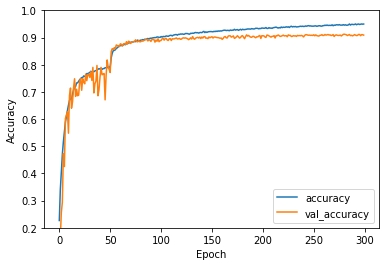

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [29]:
model.save('Jamie-0.1.h5')
model.save_weights("Jamie-0.1.weights.h5")

results = model.predict(test_images)
##tf.compat.v1.metrics.mean_per_class_accuracy(test_labels,results,10)

In [ ]:
f = open("Test",'a')
f.write("Hello, World!")
f.close()